# Financial Planning with APIs and Simulations

In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file by calling the load_dotenv function
load_dotenv()

True

## Create a Financial Planner for Emergencies

In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 18854431,
            "id": 1,
            "last_updated": 1635209354,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 1192131994833,
                    "percent_change_1h": 0.0375212766474652,
                    "percent_change_24h": 2.61581849609191,
                    "percent_change_7d": 2.02603017746222,
                    "percentage_change_1h": 0.0375212766474652,
                    "percentage_change_24h": 2.61581849609191,
                    "percentage_change_7d": 2.02603017746222,
                    "price": 63274.0,
                    "volume_24h": 31620240016
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18854431,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 118077176,
            "id": 1027,
            "last_updated": 1635209327,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 499491060520,
                    "percent_change_1h": 0.513617680943209,
                    "percent_change_24h": 2.73149505222375,
                    "percent_change_7d": 13.2045208286442,
                    "percentage_change_1h": 0.513617680943209,
                    "percentage_change_24h": 2.73149505222375,
                    "percentage_change_7d": 13.2045208286442,
                    "price": 4248.13,
                    "volume_24h": 17156148693
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 118077176,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f'The current price of BitCoin to USD is ${btc_price:,.2f}.')

The current price of BitCoin to USD is $63,274.00.


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f'The current price ofof Etherum to USD is ${eth_price:,.2f}.')


The current price ofof Etherum to USD is $4,248.13.


In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f'The current value of your BitCoin(BTC) is ${btc_value:,.2f}.')


The current value of your BitCoin(BTC) is $75,928.80.


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f'The current value of your Etherum(ETH) is ${eth_value:,.2f}.')

The current value of your Etherum(ETH) is $22,515.09.


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = eth_value + btc_value

# Print current cryptocurrency wallet balance
print(f'The total value of your cryptocurrency wallet is ${total_crypto_wallet:,.2f}.')


The total value of your cryptocurrency wallet is $98,443.89.


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['AGG', 'SPY']

# Set timeframe to 1D 
timeframe = '1D'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
date = pd.Timestamp('today')
start_date = pd.Timestamp(year=date.year, month=date.month, day=date.day-7, tz='America/New_York').isoformat()
end_date = pd.Timestamp(date, tz='America/New_York').isoformat()


In [17]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
port_ticker_df = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date).df

# Review the first 5 rows of the Alpaca DataFrame
port_ticker_df.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-10-21 00:00:00-04:00  114.01  114.0400  113.8423  113.85  4741154   
2021-10-22 00:00:00-04:00  113.97  114.1399  113.8950  114.07  3309637   
2021-10-25 00:00:00-04:00  114.06  114.2700  114.0600  114.17  7088133   

                              SPY                                     
                             open     high     low   close    volume  
time                                                                  
2021-10-21 00:00:00-04:00  451.76  453.829  451.31  453.61  33945007  
2021-10-22 00:00:00-04:00  453.13  454.670  451.05  453.13  50771701  
2021-10-25 00:00:00-04:00  454.28  455.900  452.39  455.48  37918548

In [18]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(port_ticker_df['AGG']['close'][-1])

# Print the AGG closing price
print(f'The lastest AGG closing price is ${agg_close_price:,.2f}.')

The lastest AGG closing price is $114.17.


In [19]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(port_ticker_df['SPY']['close'][-1])

# Print the SPY closing price
print(f'The lastest SPY closing price is ${spy_close_price:,.2f}.')


The lastest SPY closing price is $455.48.


In [20]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f'The current value of your AGG stocks is ${agg_value:,.2f}.')


The current value of your AGG stocks is $22,834.00.


In [21]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f'The current value of your SPY stocks is ${spy_value:,.2f}.')


The current value of your SPY stocks is $50,102.80.


In [22]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f'The total value of your stock/bond porfolio is ${total_stocks_bonds:,.2f}.')


The total value of your stock/bond porfolio is $72,936.80.


In [23]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f'The total portfolio value is ${total_portfolio:,.2f}.')


The total portfolio value is $171,380.69.


### Evaluate Emergency Fund

In [24]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]
# Review the Python list savings_data
print(savings_data)
    

[98443.889, 72936.8]


In [25]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data , index=['crypto', 'stock/bond'], columns=['amount'])

# Display the savings_df DataFrame
savings_df.head()


,amount
crypto,98443.889
stock/bond,72936.800


<AxesSubplot:title={'center':'Total Value of Portfolio'}, ylabel='Amount'>

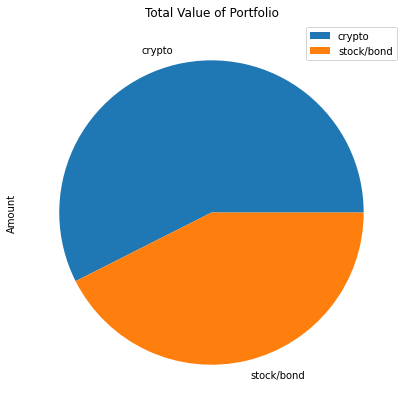

In [26]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title='Total Value of Portfolio', figsize=(14,7), ylabel='Amount')


In [27]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3* monthly_income


In [28]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
     print(f'Congratulations on exceeding your financial goal!')
elif total_portfolio == emergency_fund_value:
    print(f'Congratulations on reaching this important financial goal!')
else:
    print(f'You are still ${emergency_fund_value-total_portfolio:,.2f} away from your emergency_fund_value of ${emergency_fund_value:,.2f}.')


Congratulations on exceeding your financial goal!


## Part 2: Create a Financial Planner for Retirement

In [29]:
# Set start and end dates of 3 years back from your current date 
start_date = pd.Timestamp(year=date.year-3, month=date.month, day=date.day, tz='America/New_York').isoformat()
end_date = pd.Timestamp(date, tz='America/New_York').isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
row_limit = 1000

In [31]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
portfolio_df = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=row_limit).df


# Display both the first and last five rows of the DataFrame
display(portfolio_df.head())
display(portfolio_df.tail())



AGG                                       \
                             open    high     low    close      volume   
time                                                                     
2018-10-25 00:00:00-04:00  104.71  104.77  104.61  104.665   3882207.0   
2018-10-26 00:00:00-04:00  104.88  105.05  104.87  104.915   4411985.0   
2018-10-29 00:00:00-04:00  104.86  104.89  104.72  104.790   3599179.0   
2018-10-30 00:00:00-04:00  104.68  104.78  104.64  104.650   2246561.0   
2018-10-31 00:00:00-04:00  104.50  104.70  104.50  104.580  11670445.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2018-10-25 00:00:00-04:00  267.37  271.81  266.23  270.14   97215770  
2018-10-26 00:00:00-04:00  265.92  271.00  262.29  265.29  161147868  
2018-10-29 00:00:00-04:00  268.78  270.25  259.85  263.80  120705901  
2018-10-30 00:00:00-04:00  263.67  268.12  263.12  267.81  122643325  
2018-10-31 00:00:00-04:00  270.65  273.23  270.12  270.69   97427146

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2021-10-19 00:00:00-04:00  114.37  114.3700  114.1600  114.18  3999066.0   
2021-10-20 00:00:00-04:00  114.17  114.2900  114.0600  114.07  5881766.0   
2021-10-21 00:00:00-04:00  114.01  114.0400  113.8423  113.85  4741154.0   
2021-10-22 00:00:00-04:00  113.97  114.1399  113.8950  114.07  3309637.0   
2021-10-25 00:00:00-04:00  114.06  114.2700  114.0600  114.17  7088133.0   

                              SPY                                     
                             open     high     low   close    volume  
time                                                                  
2021-10-19 00:00:00-04:00  448.92  450.700  448.27  450.68  40790864  
2021-10-20 00:00:00-04:00  451.13  452.732  451.01  452.39  41594298  
2021-10-21 00:00:00-04:00  451.76  453.829  451.31  453.61  33945007  
2021-10-22 00:00:00-04:00  453.13  454.670  451.05  453.13  50771701  
2021-10-25 00:00:00-04:00  454.28  455.900  452.39  455.48  37918548

In [36]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
portf_mc_30y = MCSimulation(portfolio_data = portfolio_df, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

# Review the simulation input data
portf_mc_30y.portfolio_data.head()


                              AGG                                       \
                             open    high     low    close      volume   
time                                                                     
2018-10-25 00:00:00-04:00  104.71  104.77  104.61  104.665   3882207.0   
2018-10-26 00:00:00-04:00  104.88  105.05  104.87  104.915   4411985.0   
2018-10-29 00:00:00-04:00  104.86  104.89  104.72  104.790   3599179.0   
2018-10-30 00:00:00-04:00  104.68  104.78  104.64  104.650   2246561.0   
2018-10-31 00:00:00-04:00  104.50  104.70  104.50  104.580  11670445.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-10-25 00:00:00-04:00          NaN  267.37  271.81  266.23  270.14   
2018-10-26 00:00:00-04:00     0.002389  265.92  271.00  262.29  265.29   
2018-10-29 00:00:00-04:00    -0.00119

In [38]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
portf_mc_30y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012420,0.996212,1.012258,0.982285,0.989024,1.006106,1.002649,1.004344,1.009180,1.013547,...,1.000750,1.007511,0.986191,0.993433,0.998980,0.993022,0.994012,1.003488,0.993069,0.982758
2,1.025940,1.006061,1.005832,0.980467,0.986178,1.002578,1.006765,0.994194,1.001974,1.015477,...,0.992277,0.997417,0.982467,0.998778,1.000387,0.994969,0.991426,0.992508,0.992539,0.979575
3,1.034652,0.998978,1.008405,0.949857,0.986592,0.995967,0.992786,0.992476,1.003900,1.022886,...,1.010284,1.003849,0.975048,0.997523,0.987235,0.999984,1.001057,1.006351,0.980654,0.981723
4,1.045189,1.009138,0.994756,0.944067,0.974668,1.002820,0.986567,0.995559,1.000859,1.013168,...,1.003773,1.007728,0.968211,0.996588,0.988378,0.990207,0.989324,0.992990,0.969506,0.987361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,209.791702,64.431269,352.114464,49.963820,32.485250,40.239417,34.588701,27.400365,76.806312,14.063156,...,113.069003,42.144314,52.314280,22.188215,23.165003,61.015915,58.734898,48.992897,47.494631,166.242320
7557,209.923554,64.585634,347.970537,49.964652,32.082809,40.080934,34.223354,27.266831,76.447655,14.148588,...,112.596712,42.241658,53.078686,22.171481,22.992419,60.944832,58.816223,49.106335,47.985134,164.700938
7558,208.439028,64.396472,353.911694,50.667233,32.353593,40.117981,34.429710,27.164587,75.836895,14.185221,...,113.597917,42.251808,53.370334,21.958553,23.106556,60.817032,59.008943,48.410063,48.581072,164.858493
7559,207.939409,64.519415,357.581364,50.311656,31.856632,39.900735,34.434831,26.882611,75.790139,14.389002,...,111.867791,42.070660,53.266205,22.092522,23.133373,60.885388,58.418702,48.654257,48.027023,169.015833


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

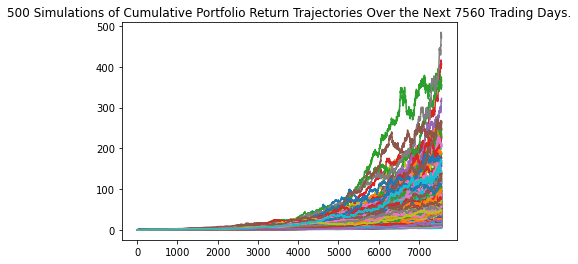

In [41]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
portf_mc_30y.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

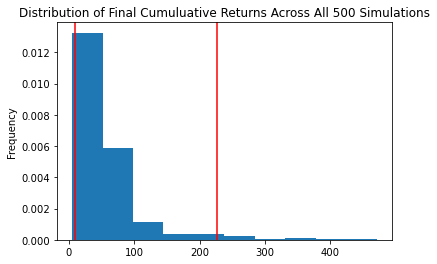

In [44]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
portf_mc_30y.plot_distribution()


In [71]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
portf_mc30y_summary = portf_mc_30y.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(portf_mc30y_summary)

count           500.000000
mean             56.235943
std              55.622609
min               4.834944
25%              23.888231
50%              41.480573
75%              67.462525
max             471.101720
95% CI Lower      9.415097
95% CI Upper    227.374470
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [72]:
# Print the current balance of the stock and bond portion of the members portfolio
def print_currbal_sb(total_stocks_bonds, agg_value, spy_value):
    print(f'Current Balance of Stock and Bond Portion: ${total_stocks_bonds:,.2f}. The value of AGG ${agg_value:,.2f} and the value of SPY ${spy_value:,.2f}.')

print_currbal_sb(total_stocks_bonds,agg_value,spy_value)

Current Balance of Stock and Bond Portion: $72,936.80. The value of AGG $22,834.00 and the value of SPY $50,102.80.


In [73]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = portf_mc30y_summary[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = portf_mc30y_summary[9] * total_stocks_bonds


# Print the result of your calculations
def print_ci_interval(ci_lower_cumulative_return, ci_upper_cumulative_return):
    print(f'The lower 95% confidence interval is ${ci_lower_cumulative_return:,.2f} and the upper 95% confidence interval is ${ci_upper_cumulative_return:,.2f}.')
print_ci_interval(ci_lower_thirty_cumulative_return, ci_upper_thirty_cumulative_return)

The lower 95% confidence interval is $686,707.06 and the upper 95% confidence interval is $16,583,966.25.


### Forecast Cumulative Returns in 10 Years

- Based on the new Monte Carlo simulation, answer the following questions:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [74]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
portf_mc_10y = MCSimulation(portfolio_data = portfolio_df, weights = [.20,.80], num_simulation=500, num_trading_days = 252*10)

# Review the simulation input data
portf_mc_10y.portfolio_data.head()


AGG                                       \
                             open    high     low    close      volume   
time                                                                     
2018-10-25 00:00:00-04:00  104.71  104.77  104.61  104.665   3882207.0   
2018-10-26 00:00:00-04:00  104.88  105.05  104.87  104.915   4411985.0   
2018-10-29 00:00:00-04:00  104.86  104.89  104.72  104.790   3599179.0   
2018-10-30 00:00:00-04:00  104.68  104.78  104.64  104.650   2246561.0   
2018-10-31 00:00:00-04:00  104.50  104.70  104.50  104.580  11670445.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-10-25 00:00:00-04:00          NaN  267.37  271.81  266.23  270.14   
2018-10-26 00:00:00-04:00     0.002389  265.92  271.00  262.29  265.29   
2018-10-29 00:00:00-04:00    -0.001191  268.78  270.25  259.85  263.80   
2018-10-30 00:00:00-04:00    -0.001336  263.67  268.12  263.12  267.81   
2018-10-31 00:00:00-04:00    -0.000669  270.65  273.23  270.12  270.69   

                                                   
                              volume daily_return  
time                                               
2018-10-25 00:00:00-04:00   97215770          NaN  
2018-10-26 00:00:00-04:00  161147868    -0.017954  
2018-10-29 00:00:00-04:00  120705901    -0.005616  
2018-10-30 00:00:00-04:00  122643325     0.015201  
2018-10-31 00:00:00-04:00   97427146     0.010754

In [54]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
portf_mc_10y.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997973,0.988896,1.011768,1.002796,0.997674,1.004616,0.994563,1.021485,1.012785,1.008871,...,1.005135,0.995806,1.008358,1.021620,1.015353,0.976207,0.998752,0.992496,0.976062,1.027448
2,0.982022,0.983855,0.999411,1.012830,1.010818,0.995156,1.004742,1.042554,1.021356,1.015571,...,1.018177,1.009930,1.024089,1.020334,1.023882,0.969464,0.998292,0.996540,0.984255,1.037894
3,0.968072,0.991150,1.007607,1.007196,0.995311,1.001342,1.019385,1.041630,1.034722,1.026304,...,1.021240,1.002495,1.020026,1.013365,1.028016,0.976719,1.014813,0.993899,1.000084,1.029689
4,0.973772,0.998612,1.020528,0.991554,1.010559,1.018104,1.002362,1.040160,1.061673,1.025815,...,1.032853,1.010918,1.027235,1.030139,1.036368,0.987555,1.015734,0.996113,1.014905,1.042245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.833531,4.729239,3.219029,4.705393,1.689751,3.455119,9.693141,19.439655,1.944836,4.191942,...,4.116331,9.882291,2.141081,16.169816,5.088134,9.842277,4.799234,3.359878,9.977765,3.209212
2517,3.851103,4.732332,3.169523,4.623597,1.673234,3.478237,9.838036,19.571752,1.971148,4.239546,...,4.167473,9.810038,2.150725,16.259147,5.133711,10.034331,4.758071,3.350935,9.922716,3.171169
2518,3.922001,4.769335,3.115072,4.676421,1.665794,3.487992,9.973296,19.559817,1.996510,4.251925,...,4.117215,9.757123,2.160876,16.437501,5.217436,10.110517,4.681413,3.372507,9.991502,3.176660
2519,3.850611,4.695553,3.103489,4.694289,1.677359,3.533706,9.919757,19.417944,2.041889,4.176863,...,4.081155,10.004167,2.173806,16.719915,5.148987,10.264867,4.652914,3.362523,9.957409,3.181308


In [1]:
# Visualize the 10-year Monte Carlo simulation by creating an overlay line plot
portf_mc_10y.plot_simulation()

NameError: name 'portf_mc_10y' is not defined

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

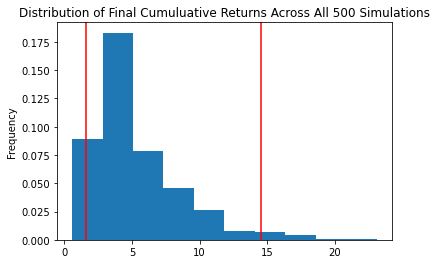

In [56]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation by plotting a histogram
portf_mc_10y.plot_distribution()

In [58]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
portf_mc10y_summary = portf_mc_10y.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(portf_mc10y_summary)

count           500.000000
mean              5.347694
std               3.259473
min               0.575445
25%               3.210394
50%               4.485616
75%               6.642961
max              23.083296
95% CI Lower      1.599299
95% CI Upper     14.561354
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [65]:
# Print the current balance of the stock and bond portion of the members portfolio
print_currbal_sb(total_stocks_bonds,agg_value,spy_value)


Current Balance of Stock and Bond Portion: $72,936.80. The value of AGG $22,834.00 and the value of SPY $50,102.80.


In [75]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = portf_mc10y_summary[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = portf_mc10y_summary[9] * total_stocks_bonds

# Print the result of your calculations
print_ci_interval(ci_lower_ten_cumulative_return, ci_upper_ten_cumulative_return)


The lower 95% confidence interval is $116,647.77 and the upper 95% confidence interval is $1,062,058.58.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?